In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/advogato.txt       
  inflating: data/celegans_metabolic.txt  
  inflating: data/cong-votes.txt     
  inflating: data/david-cooperfield.txt  
  inflating: data/euroroad_euroroad.txt  
  inflating: data/hamsterster.txt    
  inflating: data/jazz.txt           
  inflating: data/lesmis.txt         
  inflating: data/little-rock-lake.txt  
  inflating: data/moreno_blogs_blogs.txt  
  inflating: data/netscience.txt     
  inflating: data/polblogs.txt       
  inflating: data/polbooks.txt       
  inflating: data/powergrid.txt      
  inflating: data/ucidata-zachary.txt  
  inflating: data/USairport500.txt   
  inflating: data/word_adjacencies.txt  
  inflating: data/zachary            
  inflating: data/zachary.pairs      
  inflating: data/zachary.pairs.txt  
  inflating: data/zachary.txt        


In [ ]:
import networkx as nx
import numpy as np

**Questao 1: Calcule a modularidade para a rede Jazz usando método fastgreedy.**

a. 0.05

b. 0.12

**c. 0.44**

d. 0.76

e. 0.98

In [ ]:
G = nx.read_edgelist("/content/data/jazz.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [ ]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 198
Number of edges: 2742


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Encontra a estrutura de comunidades usando o método Fast Greedy e faz uma lista de cada comunidade
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


In [ ]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [ ]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

Community: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [186, 187, 188]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print("Modularity Q = ", modularity(G,communities))

Modularity Q =  0.4389078153753761


**Questao 2: Calcule a modularidade para a rede Jazz usando método Louvain.**

a. 0.98

**b. 0.44**

c. 0.05

d. 0.12

e. 0.65

In [ ]:
G = nx.read_edgelist("/content/data/jazz.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [ ]:
from networkx.algorithms.community import louvain_communities

communities = list(louvain_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

print(communities)

Community 0 : [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 100, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 76, 77, 78, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 2 : [7, 15, 21, 24, 25, 26, 27, 47, 53, 54, 66, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 138, 139, 143, 150, 154, 156, 161, 162, 186, 187, 188, 190, 192, 193, 197]
[{0, 1, 2, 3, 4, 5, 132, 6, 136, 8, 128, 11, 9, 13, 14, 134, 16, 17, 18, 14

In [ ]:
### TRANSFORMANDO A LISTA DAS COMUNIDADES EM DICIONARIO, PARA USAR A FUNCAO DE PLOT DO PROFESSOR

communities_list = list(louvain_communities(G))
communities_dict = {}
for i, values_set in enumerate(communities_list):
    for value in values_set:
        communities_dict[value] = i

print(communities_dict) # este dicionario nao está com as keys ordernadas

from collections import OrderedDict

# Ordenar as keys do dicionário
ordered_dict = {key: communities_dict[key] for key in sorted(communities_dict)}

print(ordered_dict)

{138: 0, 140: 0, 141: 0, 142: 0, 181: 0, 189: 0, 150: 0, 184: 0, 153: 0, 155: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 160: 0, 48: 0, 49: 0, 185: 0, 51: 0, 52: 0, 179: 0, 182: 0, 183: 0, 55: 0, 56: 0, 57: 0, 58: 0, 180: 0, 60: 0, 61: 0, 62: 0, 64: 0, 65: 0, 66: 0, 59: 0, 68: 0, 69: 0, 70: 0, 196: 0, 72: 0, 71: 0, 67: 0, 195: 0, 76: 0, 77: 0, 78: 0, 63: 0, 50: 0, 193: 1, 131: 1, 133: 1, 154: 1, 94: 1, 95: 1, 96: 1, 101: 1, 186: 1, 106: 1, 112: 1, 115: 1, 117: 1, 121: 1, 122: 1, 187: 1, 188: 1, 7: 2, 137: 2, 9: 2, 139: 2, 15: 2, 143: 2, 24: 2, 25: 2, 26: 2, 27: 2, 157: 2, 158: 2, 159: 2, 161: 2, 162: 2, 47: 2, 53: 2, 54: 2, 190: 2, 192: 2, 197: 2, 73: 2, 74: 2, 75: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 97: 2, 98: 2, 99: 2, 102: 2, 103: 2, 104: 2, 105: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 113: 2, 114: 2, 116: 2, 118: 2, 

In [ ]:
# Ordenar as keys do dicionário usando loop

ordered_dict = {}
for key in sorted(communities_dict):
    ordered_dict[key] = communities_dict[key]

print(ordered_dict)

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 0, 8: 2, 9: 0, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 0, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 0, 22: 2, 23: 2, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 0, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 0, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 3, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 0, 74: 0, 75: 0, 76: 1, 77: 1, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 3, 95: 3, 96: 3, 97: 0, 98: 0, 99: 0, 100: 2, 101: 3, 102: 0, 103: 0, 104: 0, 105: 0, 106: 3, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 3, 113: 0, 114: 0, 115: 3, 116: 0, 117: 3, 118: 0, 119: 0, 120: 2, 121: 3, 122: 3, 123: 0, 124: 0, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 3, 132: 2, 133: 3, 134: 2, 135: 2, 136: 2, 137: 0, 138: 

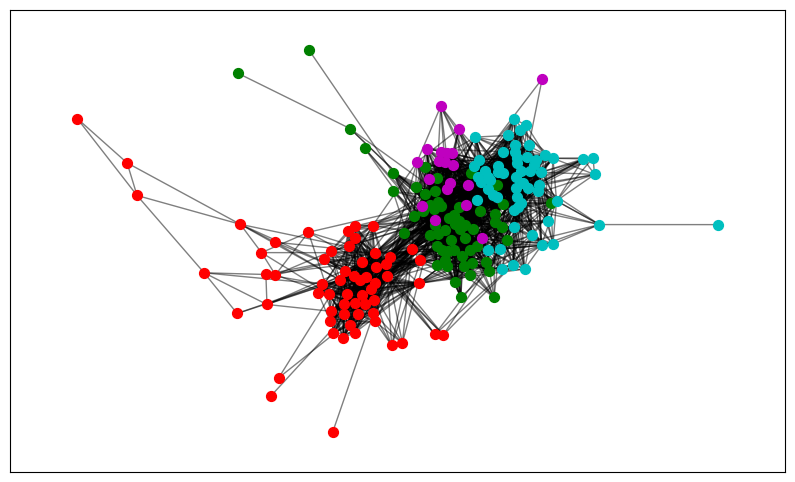

In [ ]:
import matplotlib.pyplot as plt

partitions = ordered_dict

#drawing
fig = plt.figure(figsize=(10,6))

pos = nx.spring_layout(G)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 2, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 2, 25: 2, 26: 2, 27: 2, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 2, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 2, 54: 2, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 2, 74: 2, 75: 2, 76: 3, 77: 3, 78: 3, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 1, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 1, 95: 1, 96: 1, 97: 2, 98: 2, 99: 2, 100: 0, 101: 1, 102: 2, 103: 2, 104: 2, 105: 2, 106: 1, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 1, 113: 2, 114: 2, 115: 1, 116: 2, 117: 1, 118: 2, 119: 2, 120: 0, 121: 1, 122: 1, 123: 2, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 1, 132: 0, 133: 1, 134: 0, 135: 0, 136: 0, 137: 2, 138: 

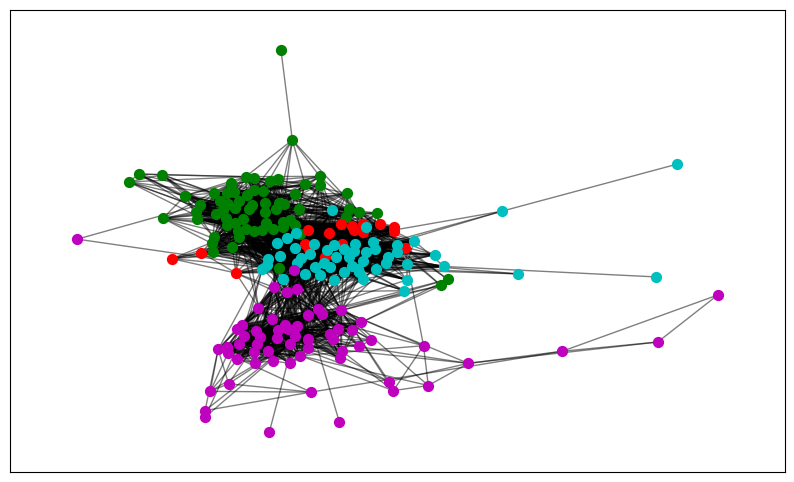

In [ ]:
# AQUI É COMO ESTAVA NO NOTEBBOK DO PROFESSOR, USANDO A FUNCAO community_louvain QUE ELE USOU

from community import community_louvain
import matplotlib.pyplot as plt

partitions = community_louvain.best_partition(G)

print(partitions)

#drawing
fig = plt.figure(figsize=(10,6))

pos = nx.spring_layout(G)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
c = list(louvain_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

Community: [7, 9, 15, 24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 116, 118, 119, 123, 124, 137, 139, 143, 157, 158, 159, 161, 162, 190, 192, 197]
Community: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 100, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 151, 152, 156, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [66, 94, 95, 96, 101, 106, 112, 115, 117, 121, 122, 131, 133, 150, 154, 186, 187, 188, 193]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [ ]:
print("Modularity Q = ", modularity(G, communities))

Modularity Q =  0.441682813367013


**Questao 3: Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.1,μ=0.2.**

a. Q(mu=0.05) = 0.98; Q(mu=0.1) = 0.71; Q(mu=0.2) = 0.54;

b. Q(mu=0.05) = 0.54; Q(mu=0.1) = 0.44; Q(mu=0.2) = 0.21;

c. Q(mu=0.05) = 0.32; Q(mu=0.1) = 0.20; Q(mu=0.2) = 0.04;

**d. Q(mu=0.05) = 0.64; Q(mu=0.1) = 0.54; Q(mu=0.2) = 0.44**;

e. Q(mu=0.05) = 0.45; Q(mu=0.1) = 0.24; Q(mu=0.2) = 0.12;

In [ ]:
N = 128
tau1 = 3
tau2 = 1.5
k = 16
minc = 32
maxc = 32

In [ ]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [ ]:
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.05, min_degree = k, max_degree = k, min_community = minc, max_community = maxc, seed = 10)

#Calculo de modularidade
c = list(louvain_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
[2. 3. 0. 2. 0. 1. 3. 3. 1. 1. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 1.
 0. 3. 2. 2. 2. 0. 1. 3. 3. 0. 1. 2. 0. 3. 2. 3. 2. 0. 0. 2. 3. 3. 3. 1.
 3. 2. 2. 2. 3. 0. 1. 2. 2. 3. 1. 0. 3. 0. 3. 0. 3. 1. 3. 0. 1. 0. 2. 1.
 1. 3. 1. 1. 3. 1. 0. 2. 2. 1. 0. 2. 2. 3. 2. 2. 1. 1. 1. 1. 2. 1. 3. 2.
 0. 1. 1. 0. 0. 3. 2. 2. 1. 1. 2. 3. 0. 1. 3. 0. 0. 3. 1. 3. 1. 2. 3. 2.
 2. 2. 2. 3. 2. 1. 1. 0.]
Modularity Q =  0.6436395353978

In [ ]:
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.1, min_degree = k, max_degree = k, min_community = minc, max_community = maxc, seed = 10)

#Calculo de modularidade
c = list(louvain_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
[3. 0. 1. 3. 1. 2. 0. 0. 2. 2. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 1. 0. 3. 3. 3. 1. 2. 0. 0. 1. 2. 3. 1. 0. 3. 0. 3. 1. 1. 3. 0. 0. 0. 2.
 0. 3. 3. 3. 0. 1. 2. 3. 3. 0. 2. 1. 0. 1. 0. 1. 0. 2. 0. 1. 2. 1. 3. 2.
 2. 0. 2. 2. 0. 2. 1. 3. 3. 2. 1. 3. 3. 0. 3. 3. 2. 2. 2. 2. 3. 2. 0. 3.
 1. 2. 2. 1. 1. 0. 3. 3. 2. 2. 3. 0. 1. 2. 0. 1. 1. 0. 2. 0. 2. 3. 0. 3.
 3. 3. 3. 0. 3. 2. 2. 1.]
Modularity Q =  0.5427818606053

In [ ]:
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.2, min_degree = k, max_degree = k, min_community = minc, max_community = maxc, seed = 10)

#Calculo de modularidade
c = list(louvain_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
[2. 1. 3. 2. 3. 0. 1. 1. 0. 0. 1. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 0.
 3. 1. 2. 2. 2. 3. 0. 1. 1. 3. 0. 2. 3. 1. 2. 1. 2. 3. 3. 2. 1. 1. 1. 0.
 1. 2. 2. 2. 1. 3. 0. 2. 2. 1. 0. 3. 1. 3. 1. 3. 1. 0. 1. 3. 0. 3. 2. 0.
 0. 1. 0. 0. 1. 0. 3. 2. 2. 0. 3. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 0. 1. 2.
 3. 0. 0. 3. 3. 1. 2. 2. 0. 0. 2. 1. 3. 0. 1. 3. 3. 1. 0. 1. 0. 2. 1. 2.
 2. 2. 2. 1. 2. 0. 0. 3.]
Modularity Q =  0.4448790997582

**Questao 4: Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.2,μ=0.4.**

a. Q(mu=0.05)=0.88;Q(mu=0.2)=0.62;Q(mu=0.4)=0.44

b. Q(mu=0.05)=0.76;Q(mu=0.2)=0.33;Q(mu=0.4)=0.23

c. Q(mu=0.05)=0.21;Q(mu=0.2)=0.13;Q(mu=0.4)=0.06

**d. Q(mu=0.05)=0.64;Q(mu=0.2)=0.43;Q(mu=0.4)=0.16**

e. Q(mu=0.05)=0.99;Q(mu=0.2)=0.76;Q(mu=0.4)=0.54

In [ ]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32

In [ ]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.05, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

c = list(greedy_modularity_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
[1. 0. 3. 1. 3. 2. 0. 0. 2. 2. 0. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 2.
 3. 0. 1. 1. 1. 3. 2. 0. 0. 3. 2. 1. 3. 0. 1. 0. 1. 3. 3. 1. 0. 0. 0. 2.
 0. 1. 1. 1. 0. 3. 2. 1. 1. 0. 2. 3. 0. 3. 0. 3. 0. 2. 0. 3. 2. 3. 1. 2.
 2. 0. 2. 2. 0. 2. 3. 1. 1. 2. 3. 1. 1. 0. 1. 1. 2. 2. 2. 2. 1. 2. 0. 1.
 3. 2. 2. 3. 3. 0. 1. 1. 2. 2. 1. 0. 3. 2. 0. 3. 3. 0. 2. 0. 2. 1. 0. 1.
 1. 1. 1. 0. 1. 2. 2. 3.]
Modularity Q =  0.6436395353978

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.2, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

c = list(greedy_modularity_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 123, 124]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 85, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 94, 101, 107, 110, 113, 115, 118]
[0. 3. 2. 0. 2. 1. 3. 3. 1. 1. 3. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 1.
 2. 3. 0. 0. 0. 2. 1. 3. 3. 2. 1. 0. 2. 3. 0. 3. 0. 2. 2. 0. 3. 3. 3. 1.
 3. 0. 0. 0. 3. 2. 1. 0. 0. 3. 1. 2. 3. 2. 3. 2. 3. 1. 3. 2. 1. 2. 0. 1.
 1. 3. 1. 1. 3. 1. 2. 0. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 3. 0.
 2. 1. 1. 2. 2. 3. 0. 0. 1. 1. 0. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 0. 3. 0.
 0. 0. 0. 0. 0. 1. 1. 2.]
Modularity Q =  0.4349088598177

In [ ]:
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.4, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

c = list(greedy_modularity_communities(G))

communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])] = nc
    nc = nc+1
    print('Community:', sorted(c[k]))

print(communities)

print("Modularity Q = ", modularity(G,communities))

Community: [0, 2, 8, 10, 13, 14, 15, 16, 17, 18, 20, 27, 29, 32, 33, 34, 35, 36, 41, 42, 44, 46, 48, 49, 53, 54, 56, 59, 61, 63, 64, 73, 79, 80, 82, 83, 86, 95, 96, 99, 103, 110, 111, 118, 120, 123]
Community: [1, 4, 7, 9, 19, 21, 24, 31, 38, 39, 47, 51, 57, 65, 66, 69, 70, 71, 72, 74, 75, 88, 90, 91, 92, 93, 97, 98, 100, 101, 102, 106, 107, 108, 112, 114, 116, 117, 122, 125]
Community: [3, 5, 6, 11, 23, 25, 26, 28, 37, 40, 45, 50, 52, 55, 58, 60, 67, 68, 76, 77, 81, 85, 89, 94, 104, 109, 115, 121, 124, 126]
Community: [12, 22, 43, 62, 78, 105, 113, 119, 127]
Community: [30, 84, 87]
[0. 1. 0. 2. 1. 2. 2. 1. 0. 1. 0. 2. 3. 0. 0. 0. 0. 0. 0. 1. 0. 1. 3. 2.
 1. 2. 2. 0. 2. 0. 4. 1. 0. 0. 0. 0. 0. 2. 1. 1. 2. 0. 0. 3. 0. 2. 0. 1.
 0. 0. 2. 1. 2. 0. 0. 2. 0. 1. 2. 0. 2. 0. 3. 0. 0. 1. 1. 2. 2. 1. 1. 1.
 1. 0. 1. 1. 2. 2. 3. 0. 0. 2. 0. 0. 4. 2. 0. 4. 1. 2. 1. 1. 1. 1. 2. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 2. 3. 1. 1. 1. 2. 0. 0. 1. 3. 1. 2. 1. 1. 0. 3.
 0. 2. 1. 0. 2. 1. 2. 3.]
Modularity Q =  0.1